## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 37s 740us/step - loss: 2.2519 - acc: 0.1700 - val_loss: 2.1945 - val_acc: 0.2180
Epoch 2/200
50000/50000 [==============================] - 24s 489us/step - loss: 2.1609 - acc: 0.2346 - val_loss: 2.1277 - val_acc: 0.2532
Epoch 3/200
50000/50000 [==============================] - 35s 709us/step - loss: 2.1045 - acc: 0.2596 - val_loss: 2.0794 - val_acc: 0.2689
Epoch 4/200
50000/50000 [==============================] - 30s 606us/step - loss: 2.0612 - acc: 0.2748 - val_loss: 2.0410 - val_acc: 0.2818
Epoch 5/200
50000/50000 [==============================] - 24s 486us/step - loss: 2.0259 - acc: 0.2887 - val_loss: 2.0092 - val_acc: 0.2924
Epoch 6/200
50000/50000 [==============================] - 25s 501us/step - loss: 1.9966 - acc: 0.3000 - val_loss: 1.9827 - val_acc: 0.3063
Epoch 7/200
50000/50000 [==============================] - 18s

50000/50000 [==============================] - 43s 853us/step - loss: 1.6436 - acc: 0.4282 - val_loss: 1.6524 - val_acc: 0.4274
Epoch 58/200
50000/50000 [==============================] - 43s 859us/step - loss: 1.6407 - acc: 0.4292 - val_loss: 1.6497 - val_acc: 0.4257
Epoch 59/200
50000/50000 [==============================] - 45s 909us/step - loss: 1.6378 - acc: 0.4292 - val_loss: 1.6480 - val_acc: 0.4265
Epoch 60/200
50000/50000 [==============================] - 43s 858us/step - loss: 1.6350 - acc: 0.4298 - val_loss: 1.6460 - val_acc: 0.4279
Epoch 61/200
50000/50000 [==============================] - 41s 815us/step - loss: 1.6318 - acc: 0.4326 - val_loss: 1.6471 - val_acc: 0.4272
Epoch 62/200
50000/50000 [==============================] - 31s 630us/step - loss: 1.6292 - acc: 0.4313 - val_loss: 1.6391 - val_acc: 0.4319
Epoch 63/200
50000/50000 [==============================] - 30s 593us/step - loss: 1.6260 - acc: 0.4335 - val_loss: 1.6379 - val_acc: 0.4327
Epoch 64/200
50000/50000 [

C:\Users\acer\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.193898). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 42s 835us/step - loss: 1.5891 - acc: 0.4453 - val_loss: 1.6053 - val_acc: 0.4418
Epoch 78/200
50000/50000 [==============================] - 39s 774us/step - loss: 1.5864 - acc: 0.4483 - val_loss: 1.6049 - val_acc: 0.4399
Epoch 79/200
50000/50000 [==============================] - 42s 833us/step - loss: 1.5841 - acc: 0.4474 - val_loss: 1.5999 - val_acc: 0.4458
Epoch 80/200
50000/50000 [==============================] - 40s 801us/step - loss: 1.5815 - acc: 0.4489 - val_loss: 1.5989 - val_acc: 0.4455
Epoch 81/200
50000/50000 [==============================] - 44s 889us/step - loss: 1.5792 - acc: 0.4496 - val_loss: 1.5944 - val_acc: 0.4478
Epoch 82/200
50000/50000 [==============================] - 41s 827us/step - loss: 1.5770 - acc: 0.4499 - val_loss: 1.5947 - val_acc: 0.4422
Epoch 83/200
50000/50000 [==============================] - 40s 805us/step - loss: 1.5743 - acc: 0.4521 - val_loss: 1.5922 - val_acc: 0.4466
Epoch 84/200
50000/50000 [

Epoch 135/200
50000/50000 [==============================] - 62s 1ms/step - loss: 1.4727 - acc: 0.4866 - val_loss: 1.5148 - val_acc: 0.4651
Epoch 136/200
50000/50000 [==============================] - 49s 971us/step - loss: 1.4712 - acc: 0.4869 - val_loss: 1.5090 - val_acc: 0.4690
Epoch 137/200
50000/50000 [==============================] - 39s 788us/step - loss: 1.4695 - acc: 0.4870 - val_loss: 1.5085 - val_acc: 0.4653
Epoch 138/200
50000/50000 [==============================] - 28s 565us/step - loss: 1.4676 - acc: 0.4884 - val_loss: 1.5064 - val_acc: 0.4693
Epoch 139/200
50000/50000 [==============================] - 26s 527us/step - loss: 1.4662 - acc: 0.4886 - val_loss: 1.5079 - val_acc: 0.4682
Epoch 140/200
50000/50000 [==============================] - 37s 735us/step - loss: 1.4646 - acc: 0.4892 - val_loss: 1.5036 - val_acc: 0.4702
Epoch 141/200
50000/50000 [==============================] - 41s 817us/step - loss: 1.4632 - acc: 0.4891 - val_loss: 1.5031 - val_acc: 0.4705
Epoch 14

50000/50000 [==============================] - 15s 290us/step - loss: 1.3848 - acc: 0.5175 - val_loss: 1.4519 - val_acc: 0.4841
Epoch 193/200
50000/50000 [==============================] - 15s 292us/step - loss: 1.3835 - acc: 0.5175 - val_loss: 1.4527 - val_acc: 0.4833
Epoch 194/200
50000/50000 [==============================] - 15s 294us/step - loss: 1.3824 - acc: 0.5186 - val_loss: 1.4467 - val_acc: 0.4885
Epoch 195/200
50000/50000 [==============================] - 15s 291us/step - loss: 1.3806 - acc: 0.5190 - val_loss: 1.4593 - val_acc: 0.4834
Epoch 196/200
50000/50000 [==============================] - 15s 292us/step - loss: 1.3799 - acc: 0.5190 - val_loss: 1.4498 - val_acc: 0.4845
Epoch 197/200
50000/50000 [==============================] - 15s 291us/step - loss: 1.3777 - acc: 0.5202 - val_loss: 1.4447 - val_acc: 0.4859
Epoch 198/200
50000/50000 [==============================] - 15s 294us/step - loss: 1.3765 - acc: 0.5204 - val_loss: 1.4473 - val_acc: 0.4862
Epoch 199/200
50000/

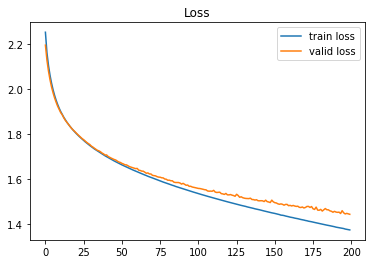

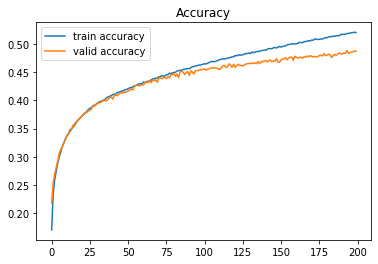

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()